##Importing Libraries





In [55]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
!pip install seaborn
import seaborn as sns

##Data Prepocessing


###Training image preprocessing


In [5]:
import tensorflow as tf
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256,256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


###Validation Preprocessing

In [6]:
import tensorflow as tf
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256,256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [7]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [8]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[174. 174. 176.]
   [174. 174. 176.]
   [173. 173. 175.]
   ...
   [149. 149. 149.]
   [149. 149. 149.]
   [150. 150. 150.]]

  [[174. 174. 176.]
   [174. 174. 176.]
   [173. 173. 175.]
   ...
   [150. 150. 150.]
   [151. 151. 151.]
   [151. 151. 151.]]

  [[174. 174. 176.]
   [174. 174. 176.]
   [173. 173. 175.]
   ...
   [151. 151. 151.]
   [152. 152. 152.]
   [152. 152. 152.]]

  ...

  [[118. 116. 121.]
   [118. 116. 121.]
   [117. 115. 120.]
   ...
   [110. 105. 109.]
   [110. 105. 109.]
   [110. 105. 109.]]

  [[121. 119. 124.]
   [121. 119. 124.]
   [122. 120. 125.]
   ...
   [111. 106. 110.]
   [111. 106. 110.]
   [109. 104. 108.]]

  [[118. 116. 121.]
   [119. 117. 122.]
   [120. 118. 123.]
   ...
   [112. 107. 111.]
   [110. 105. 109.]
   [107. 102. 106.]]]


 [[[175. 165. 163.]
   [196. 186. 184.]
   [184. 174. 172.]
   ...
   [210. 206. 207.]
   [211. 207. 208.]
   [210. 206. 207.]]

  [[240. 230. 228.]
   [186. 176. 174.]
   [220. 210. 208.]
   ...
   [212. 2

###To avoid overshooting


1.Choose small learning rate default 0.001 we are tking 0.0001
2.There may be chance of Underfitting,so increase number of neuron
3.Add more convolution layer to extract more feature from images there may be possibility that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature


##Building Model

In [9]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models

In [10]:
model = tf.keras.models.Sequential()

In [11]:
#Building Convolution Layer

In [13]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(256,256,3)))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(units=1500,activation='relu'))

In [20]:
model.add(Dropout(0.4))

In [21]:
#Output layer
model.add(Dense(units=38,activation='softmax'))

##Compiling Model


In [22]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 14, 14, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 7, 7, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       6,913,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 11,701,258 (44.64 MB)

 Trainable params: 11,701,258 (44.64 MB)

 Non-trainable params: 0 (0.00 B)

###Model Training

In [22]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 9284s 4s/step - accuracy: 0.2468 - loss: 2.6346 - val_accuracy: 0.7140 - val_loss: 0.9032
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 9300s 4s/step - accuracy: 0.7201 - loss: 0.8957 - val_accuracy: 0.8045 - val_loss: 0.6128
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 9749s 4s/step - accuracy: 0.8087 - loss: 0.6008 - val_accuracy: 0.8243 - val_loss: 0.5479
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 35296s 16s/step - accuracy: 0.8465 - loss: 0.4760 - val_accuracy: 0.8477 - val_loss: 0.4765
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 9545s 4s/step - accuracy: 0.8650 - loss: 0.4121 - val_accuracy: 0.8498 - val_loss: 0.4758
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 7967s 4s/step - accuracy: 0.8761 - loss: 0.3823 - val_accuracy: 0.8637 - val_loss: 0.4351
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 10517s 5s/step - accuracy: 0.8884 - loss: 0.3497 - val_accuracy: 0.8474 - val_loss: 0.4840
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 7690s 3s/step - accuracy: 0.890

##Model Evaluation

In [23]:
#Model Evaluation on Training Set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2359s 1s/step - accuracy: 0.9258 - loss: 0.2197


In [24]:
print(train_loss,train_acc)

0.20437367260456085 0.9326267838478088


In [25]:
#Model on validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 609s 1s/step - accuracy: 0.8728 - loss: 0.4207


In [26]:
print(val_loss,val_acc)

0.4147295355796814 0.87576824426651


###Saving Model

In [27]:
model.save("trained_model.h5")

In [28]:
model.save("trained_model.keras")

In [29]:
training_history.history

{'accuracy': [0.43270501494407654,
  0.7467387318611145,
  0.8186072707176208,
  0.8495340943336487,
  0.866391658782959,
  0.877800703048706,
  0.887573778629303,
  0.8931787610054016,
  0.8928373456001282,
  0.896237313747406],
 'loss': [1.9143670797348022,
  0.8073105216026306,
  0.5703120827674866,
  0.47036418318748474,
  0.4115139842033386,
  0.37830492854118347,
  0.3473532199859619,
  0.32996800541877747,
  0.3350876569747925,
  0.32486769556999207],
 'val_accuracy': [0.7140336632728577,
  0.804461658000946,
  0.8242658972740173,
  0.8477122783660889,
  0.8497610092163086,
  0.8637036085128784,
  0.8473708033561707,
  0.8805485963821411,
  0.883223295211792,
  0.87576824426651],
 'val_loss': [0.9032198786735535,
  0.6128196120262146,
  0.54791259765625,
  0.47653108835220337,
  0.4757836163043976,
  0.4350525438785553,
  0.48400014638900757,
  0.3887461721897125,
  0.39177021384239197,
  0.4147297739982605]}

In [30]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [31]:
training_history.history['accuracy']

[0.43270501494407654,
 0.7467387318611145,
 0.8186072707176208,
 0.8495340943336487,
 0.866391658782959,
 0.877800703048706,
 0.887573778629303,
 0.8931787610054016,
 0.8928373456001282,
 0.896237313747406]

###Accuracy Visualization

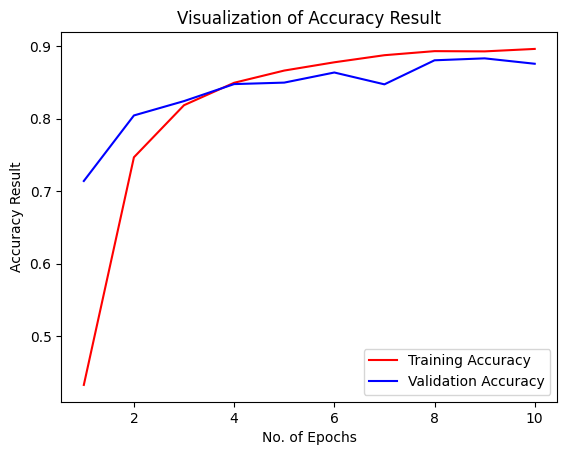

In [32]:
epochs =[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

###Some other metrics for model evaluation

In [24]:
class_names = validation_set.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [25]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256,256),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [26]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 621s 1s/step


(array([[0.04168084, 0.01114471, 0.02468597, ..., 0.02438256, 0.02435746,
         0.01922345],
        [0.04027002, 0.00975058, 0.0234574 , ..., 0.02294973, 0.02636541,
         0.02198426],
        [0.04125683, 0.0103917 , 0.02361157, ..., 0.02618718, 0.02398849,
         0.01910395],
        ...,
        [0.04091984, 0.00983604, 0.02389009, ..., 0.02447248, 0.02414627,
         0.01947911],
        [0.04264363, 0.00932698, 0.02376352, ..., 0.02335225, 0.02381914,
         0.0202729 ],
        [0.04710442, 0.0059357 , 0.0207511 , ..., 0.01989312, 0.0257718 ,
         0.01701475]], dtype=float32),
 (17572, 38))

In [27]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [28]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 7, 29,  7, ..., 29,  7, 29], dtype=int64)>

In [29]:
true_categories =tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [30]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [50]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
print("Shape of Y_true:", Y_true.shape)
print("Shape of predicted_categories:", predicted_categories.shape)

Shape of Y_true: (17572,)
Shape of predicted_categories: (17572,)


In [52]:
print(classification_report(Y_true,predicted_categories,target_names=class_names,zero_division=0))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       504
                                 Apple___Black_rot       0.00      0.00      0.00       497
                          Apple___Cedar_apple_rust       0.00      0.00      0.00       440
                                   Apple___healthy       0.00      0.00      0.00       502
                               Blueberry___healthy       0.00      0.00      0.00       454
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00       421
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.01      0.20      0.02       410
                       Corn_(maize)___Common_rust_       0.00      0.00      0.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.00      0.00      0.

In [53]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

##Confusion Matrix Visualization

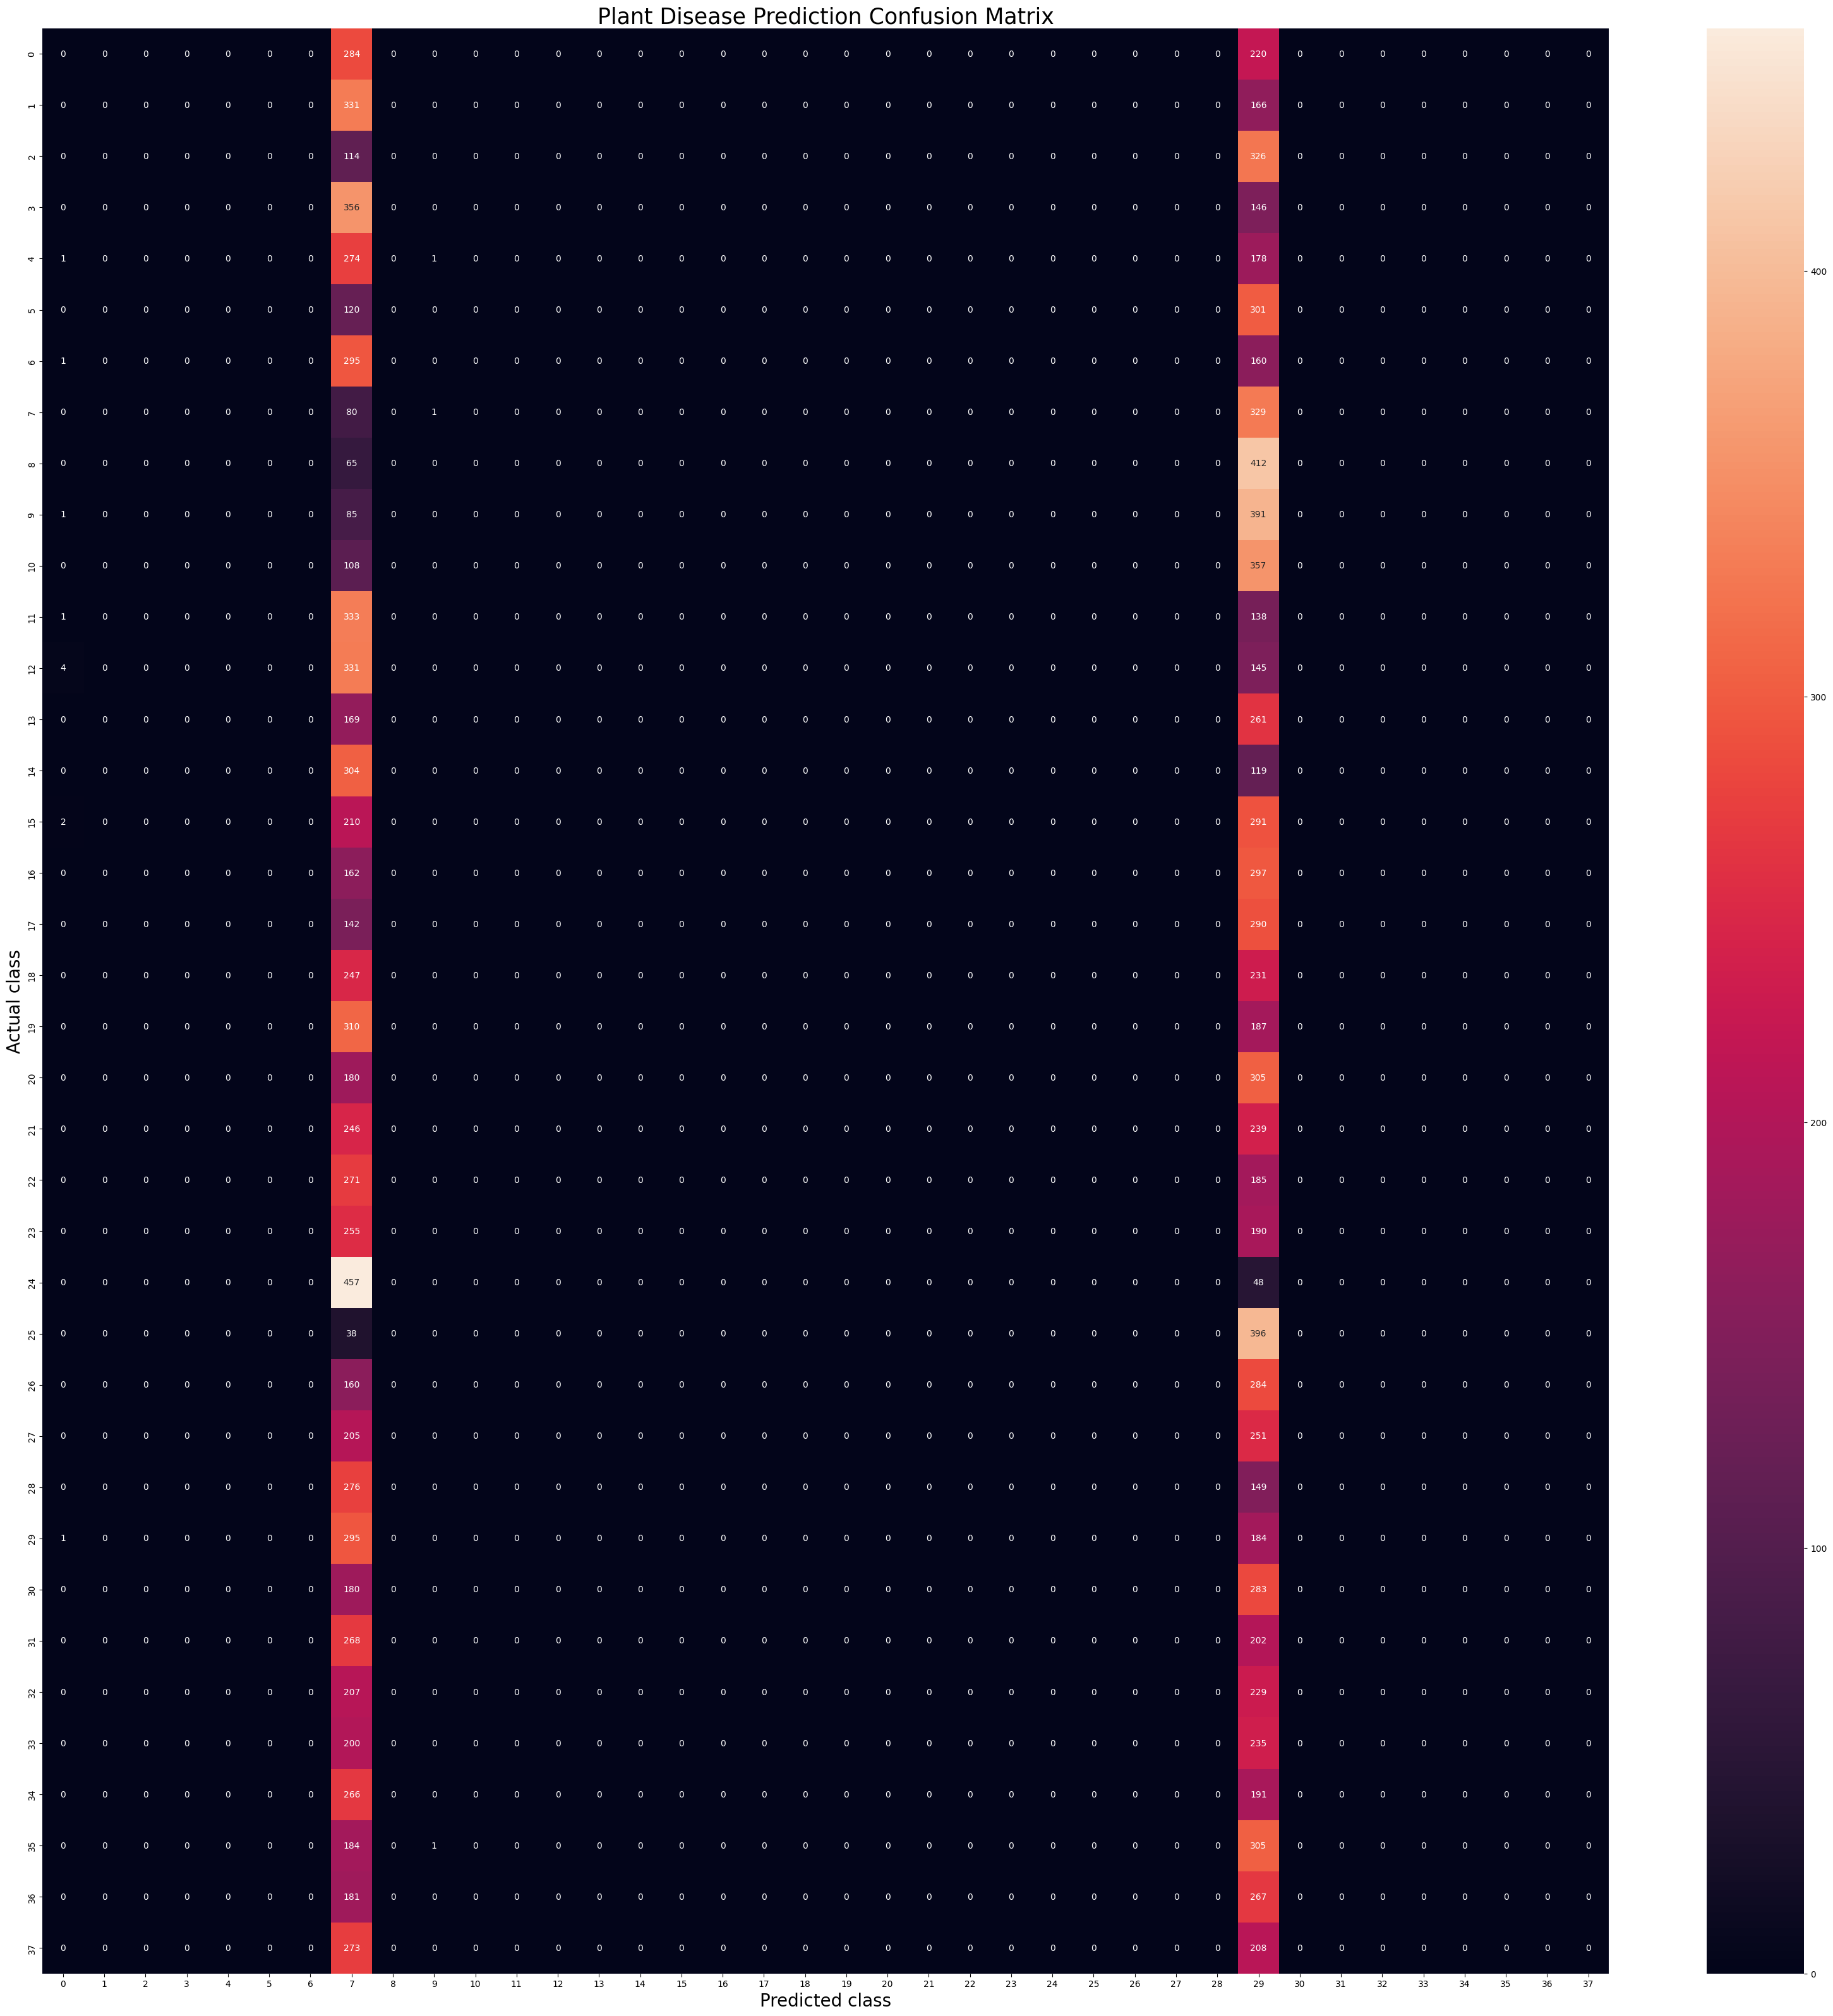

In [56]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True, fmt='d',annot_kws={'size':10})
plt.xlabel("Predicted class",fontsize=20)
plt.ylabel("Actual class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()